In [45]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 0.1.3

### Theoretical solution:

In [42]:
14*13


182

In [44]:
1 / (13 * 14 * 182) * sum([(y-1) * (15-y)**2 for y in range(1, 16)])

0.09615384615384615

### Monte Carlo simulation:

In [97]:
N = 100_000
successes = 0
choices = np.arange(1, 16)

for _ in range(N):
    yesterday = np.random.choice(choices, size=3, replace=False)
    today = np.random.choice(choices, size=3, replace=False)
    yesterday.sort()
    today.sort()
    print(yesterday, today)
    successes += (yesterday[:2] == today[:2]).all()

print(successes, N, successes / N)

[ 4  5 11] [ 4 11 14]
[ 2  4 12] [ 2 12 14]
[ 4  9 12] [11 12 13]
[ 4 13 14] [ 6  8 11]
[ 3  4 13] [ 5  7 13]
[ 4 13 14] [ 1  5 15]
[3 4 9] [6 7 9]
[ 3  4 15] [ 1  5 11]
[ 4 12 13] [ 2 12 15]
[ 1 11 15] [5 8 9]
[ 9 14 15] [ 1 12 15]
[ 9 13 15] [ 5 13 15]
[1 4 9] [ 7 12 13]
[ 7  9 15] [ 2  6 14]
[ 5  7 13] [1 3 5]
[ 3  9 11] [ 1  4 13]
[ 6  7 14] [ 5 10 14]
[3 7 9] [ 4  5 11]
[ 3  8 14] [1 3 9]
[3 4 7] [ 3  5 11]
[ 6  8 10] [ 4 10 12]
[ 2  5 12] [ 4  9 14]
[ 2  3 14] [2 4 5]
[2 7 9] [ 3  7 11]
[4 5 7] [ 1  9 11]
[ 6  9 13] [ 9 12 13]
[ 9 10 15] [1 2 5]
[ 5  8 10] [ 6 12 15]
[1 3 8] [ 5  6 13]
[ 5 10 14] [ 2  4 11]
[ 5 11 12] [ 4 12 13]
[4 5 8] [11 14 15]
[6 7 9] [ 6 10 14]
[ 6 10 15] [ 2 12 13]
[ 9 12 13] [2 5 6]
[ 6  9 14] [ 1  7 11]
[1 6 7] [ 1  2 12]
[1 3 9] [ 3  7 11]
[ 9 14 15] [ 1  6 13]
[ 3 14 15] [ 3  4 15]
[ 1  7 15] [ 6 10 12]
[ 4 12 15] [ 2  9 10]
[1 2 4] [1 8 9]
[ 6  7 12] [4 5 8]
[ 2  6 12] [4 5 6]
[ 1 12 14] [ 3  8 13]
[ 2  6 13] [ 5 14 15]
[ 9 10 13] [ 1 11 15]
[ 6  7 13]

In [41]:
N = 100_000
successes = 0
choices = np.arange(1, 16)

for _ in range(N):
    yesterday = np.random.choice(choices, size=3, replace=False)
    today = np.random.choice(choices, size=3, replace=False)
    yesterday.sort()
    today.sort()
    successes += (yesterday[:2] == today[:2]).all()

print(successes, N, successes / N)

1435 100000 0.01435


In [1]:
1/65

0.015384615384615385

## Problem 0.3

In [95]:
def simulate_k(trials, n, k, plot=True):
    p = [0] * n

    for _ in range(trials):
        offers = np.arange(1, 51)
        np.random.shuffle(offers)
        x0 = offers[:k].min()

        for i in range(k, n):
            if offers[i] < x0: # find first offer better than x0
                p[offers[i]-1] += 1 / trials
                break
            elif i == n - 1: # if reach last offer, choose it
                p[offers[i]-1] += 1 / trials
    
    if plot:
        plt.bar(np.arange(1, n+1), p)
        plt.xlabel('Rank of selected offer')
        plt.ylabel('Frequency selected')
        plt.title('Simulated offer selection')
    
    return p

def simulate(trials, n, k_range):
    p_best_per_k = [0] * (n - 1)

    for k in k_range:
        p = simulate_k(trials, n, k, plot=False)
        p_best_per_k[k-1] = p[0]
    
    plt.bar(np.arange(1, n), p_best_per_k)
    plt.xlabel('K')
    plt.ylabel('Frequency selected')
    plt.title('Best offer selection vs. K')

### Problem 0.3.1

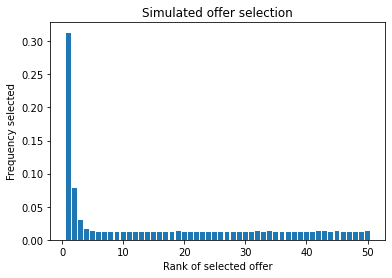

In [94]:
simulate_k(100_000, 50, 30);

### Problem 0.3.2

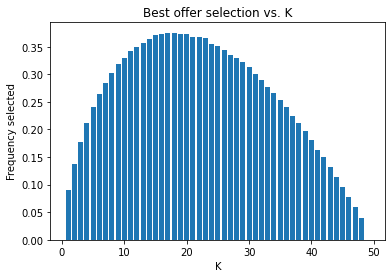

In [96]:
simulate(100_000, 50, range(1, 49))